# Data pre-process

In [8]:
import csv
import cv2
import numpy as np
import os
import pickle
from sklearn.utils import shuffle
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

## 1 Load data

In [2]:
lines = []
with open('./sample_data/data/driving_log.csv') as sample_file:
    sample_file.readline()
    reader = csv.reader(sample_file)
    for line in reader:
        lines.append(line)
print(len(lines))

8036


## 2 Exploratory visualization

#### Origin

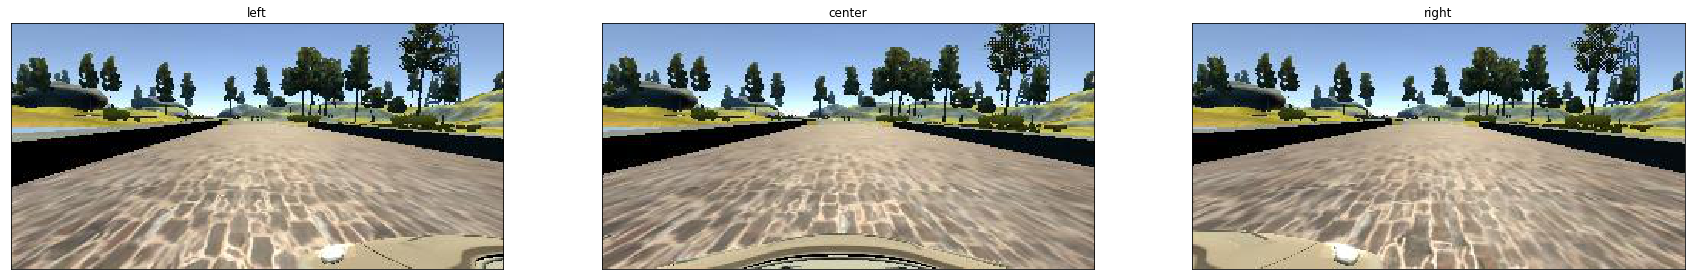

In [50]:
index = random.randint(0, len(lines))
center_path = './sample_data/data/IMG/' + lines[0][0].split('/')[-1]
left_path = './sample_data/data/IMG/' + lines[0][1].split('/')[-1]
right_path = './sample_data/data/IMG/' + lines[0][2].split('/')[-1]
center_img = plt.imread(center_path)
left_img = plt.imread(left_path)
right_img = plt.imread(right_path)

fig, axes = plt.subplots(1, 3 ,figsize=(25, 8))
axes[0].imshow(left_img),axes[0].set_title('left'),axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(center_img),axes[1].set_title('center'),axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(right_img),axes[2].set_title('right'),axes[2].set_xticks([]), axes[2].set_yticks([])

plt.savefig('./result_images/rgb.jpg')

#### Resize

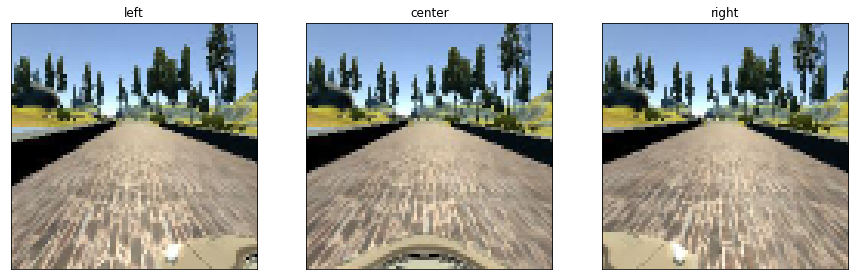

In [39]:
center_resize = cv2.resize(center_img, (80,80))
left_resize = cv2.resize(left_img, (80,80))
right_resize = cv2.resize(right_img, (80,80))

fig, axes = plt.subplots(1, 3 ,figsize=(15, 8))
axes[0].imshow(left_resize),axes[0].set_title('left'),axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(center_resize),axes[1].set_title('center'),axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(right_resize),axes[2].set_title('right'),axes[2].set_xticks([]), axes[2].set_yticks([])

plt.savefig('./result images/rgb_resize.jpg')

## 3 Get images and tune angles

In [35]:
images = []
angles = []
for line in tqdm(lines):
    center_path = './sample_data/data/IMG/' + line[0].split('/')[-1]
    center_img = plt.imread(center_path)
    center_img = cv2.resize(center_img, (80,80))
    center_angle = float(line[3])
    images.append(center_img)
    angles.append(center_angle)
    
    left_path = './sample_data/data/IMG/' + line[1].split('/')[-1]
    left_img = plt.imread(left_path)
    left_img = cv2.resize(left_img, (80,80))
    left_angle = float(line[3]) + 0.10
    images.append(left_img)
    angles.append(left_angle)
    
    right_path = './sample_data/data/IMG/' + line[2].split('/')[-1]
    right_img = plt.imread(right_path)
    right_img = cv2.resize(right_img, (80,80))
    right_angle = float(line[3]) - 0.10
    images.append(right_img)
    angles.append(right_angle)
    
X_train = np.array(images)
y_train = np.array(angles)
print(X_train.shape, y_train.shape)

100%|██████████| 8036/8036 [01:52<00:00, 71.47it/s]


(24108, 80, 80, 3) (24108,)


## 4 Save the pre-processed data

In [36]:
def save_data(pickle_file):
    if not os.path.isfile(pickle_file):
        print('Saving data to pickle file...')
        try:
            with open(pickle_file, 'wb') as pfile:
                pickle.dump(
                    {
                        'X_train': X_train,
                        'y_train': y_train
                    },
                    pfile, protocol=2)
        except Exception as e:
            print('Unable to save data to', pickle_file, ':', e)
            raise
    print('Data cached in pickle file.')
    
save_data('./pre-data.pickle')

Data cached in pickle file.
